In [2]:
%matplotlib inline 

from statsmodels.compat import lzip 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [3]:
df = pd.read_csv('elasticity.csv')

In [4]:
df.head(10)

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000
5,1978,2,21.7602,182.5333
6,1978,3,21.6064,186.2000
7,1978,4,21.8814,186.4333
8,1979,1,20.5086,211.7000
9,1979,2,19.0408,231.5000


In [6]:
# Completeness 
df.isnull().sum()

Year        0
Quarter     0
Quantity    0
Price       0
dtype: int64

In [7]:
# OLS 

df_model = ols('Quantity ~ Price',
              data = df).fit()

In [8]:
print(df_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           1.69e-46
Time:                        16:59:31   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

In [9]:
# P value col = P > |t| 

# P-val = take t-val, place it on t-dist
    # calc P(getting value as extreme as t-val calculated)

In [10]:
# High R-squared = model explains response variation well

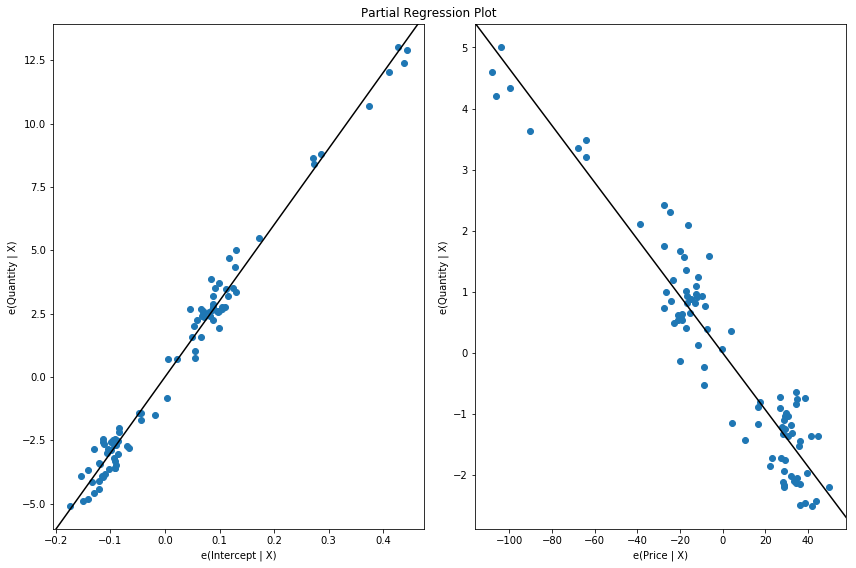

In [13]:
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.plot_partregress_grid(df_model, fig = fig)

In [14]:
# predictor (Price) provides information about response (Quantity)

# Residuals not far from regression line 

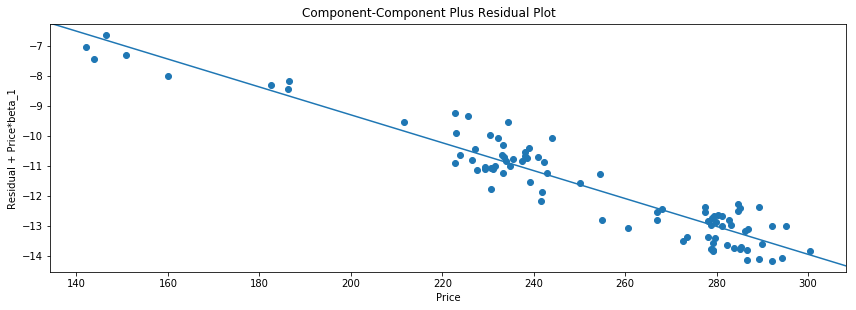

In [16]:
# Component-Component Plus Residual 
    # CCPR plots
    
fig = plt.figure(figsize = (12, 8))

fig = sm.graphics.plot_ccpr_grid(df_model, fig = fig)

In [17]:
# CCPR = judge effect of one regressor on response 
    # by accounting for the effects of other independent variables 
    
# Q explained by P = Definite linear relationship
    # Not many observations exerting considerable influence on relationships 

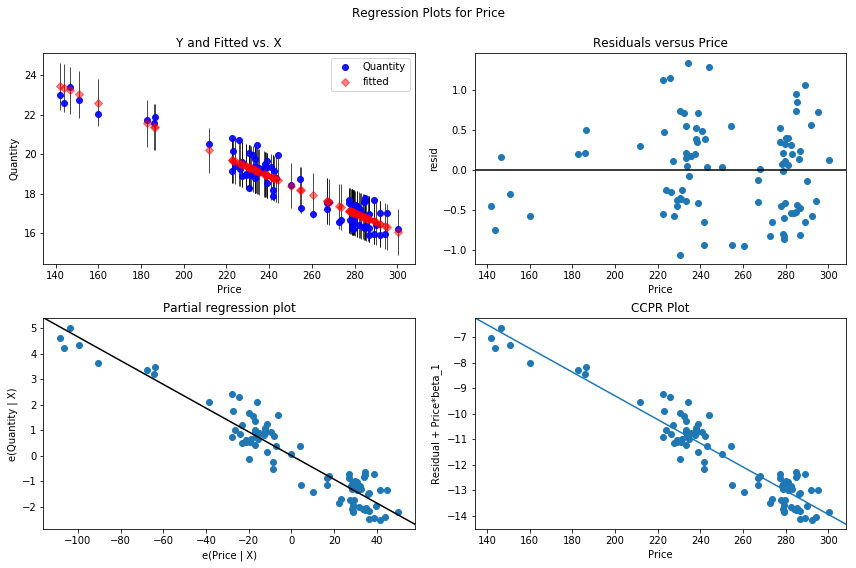

In [20]:
# Regression plots 
    # Check model assumptions with respect to single regressor (Price) 
    
fig = plt.figure(figsize = (12, 8))

fig = sm.graphics.plot_regress_exog(df_model, 'Price', fig = fig)

In [21]:
# Recursive least square 
    # filter for investigating param instability

df['Year'] = pd.to_datetime(df['Year'], format = "%Y")

In [28]:
df.head()

,Quantity,Price
Date,,
1977-03-01,22.9976,142.1667
1977-06-01,22.6131,143.9333
1977-09-01,23.4054,146.5000
1977-12-01,22.7401,150.8000
1978-03-01,22.0441,160.0000


In [23]:
from pandas.tseries.offsets import *

df['Date'] = df.apply(lambda x: (x['Year'] + BQuarterBegin(x['Quarter'])),
                     axis = 1)

In [25]:
df.drop(['Year', 'Quarter'], axis = 1, inplace = True)

In [27]:
df.set_index('Date', inplace = True)

In [31]:
# RLS estimation 

endog = df['Quantity']
exog = sm.add_constant(df['Price'])

mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:               Quantity   No. Observations:                   91
Model:                    RecursiveLS   Log Likelihood                 -86.733
Date:                Thu, 01 Aug 2019   R-squared:                       0.901
Time:                        17:22:01   AIC                            177.467
Sample:                    03-01-1977   BIC                            182.488
                         - 09-01-1999   HQIC                           179.493
Covariance Type:            nonrobust   Scale                            0.329
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0515      0.413     72.701      0.000      29.241      30.862
Price         -0.0465      0.002    -28.482      0.000      -0.050      -0.043
Ljung-Box (Q):                      422.30   Jarque-

C:\Users\ke117\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency BQS-DEC will be used.
  % freq, ValueWarning)


In [32]:
# Recursive = repeating process, output at each stage applied as input in succeeding stage

# RLS models computes regression params recursively
    # generate as many estimates as data points 
    
# summary table presents params estimated on entire sample 
    # estimates equivalent to OLS estimates 

C:\Users\ke117\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


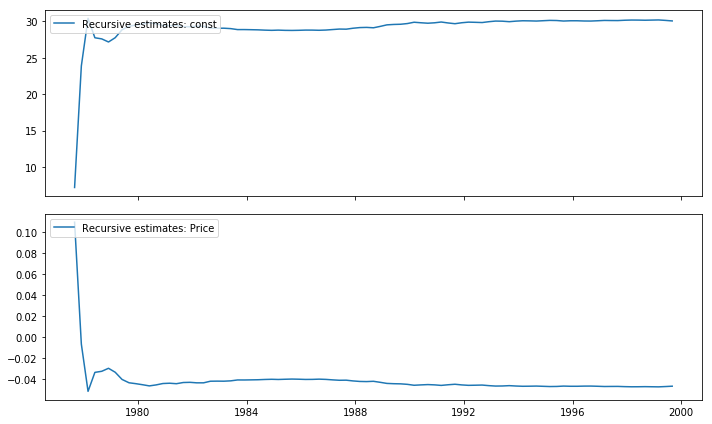

In [33]:
# Recursively estimated coefficients on a given variable 
res.plot_recursive_coefficient(range(mod.k_exog), alpha = None,
                              figsize = (10, 6));

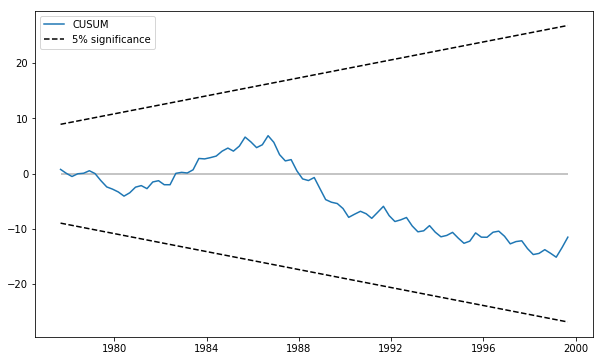

In [34]:
# Check for param stability 

fig = res.plot_cusum(figsize = (10, 6));

In [ ]:
# CUSUM stat does not move outside 5% sig 
    # fail to reject H0 of stable parameters at 5% level 